<a href="https://colab.research.google.com/github/ShreyasJothish/DS-Sprint-01-Dealing-With-Data/blob/master/module3-make-explanatory-visualizations/LS_DS_123_Make_explanatory_visualizations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

_Lambda School Data Science_

# Choose appropriate visualizations


Recreate this [example by FiveThirtyEight:](https://fivethirtyeight.com/features/al-gores-new-movie-exposes-the-big-flaw-in-online-movie-ratings/)

![](https://fivethirtyeight.com/wp-content/uploads/2017/09/mehtahickey-inconvenient-0830-1.png?w=575)

Using this data:

https://github.com/fivethirtyeight/data/tree/master/inconvenient-sequel

### Stretch goals

Recreate more examples from [FiveThityEight's shared data repository](https://data.fivethirtyeight.com/).

For example:
- [thanksgiving-2015](https://fivethirtyeight.com/features/heres-what-your-part-of-america-eats-on-thanksgiving/) ([`altair`](https://altair-viz.github.io/gallery/index.html#maps))
- [candy-power-ranking](https://fivethirtyeight.com/features/the-ultimate-halloween-candy-power-ranking/) ([`statsmodels`](https://www.statsmodels.org/stable/index.html))

# Trying to recreate 
**Fault Line No. 3:**

Men vs. women

In [1]:
from IPython.display import display, Image

url = 'https://fivethirtyeight.com/wp-content/uploads/2017/09/methahickey-inconvenient-0830-6.png?w=450'
#example = Image(url=url,width=575) - width of image can be set here also.
example = Image(url=url)

display(example)

In [0]:
# Load and perform initial data validation
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Using raw URL from https://github.com/fivethirtyeight/data/tree/master/inconvenient-sequel
df = pd.read_csv('https://raw.githubusercontent.com/fivethirtyeight/data/master/inconvenient-sequel/ratings.csv')

In [3]:
df.shape

(80053, 27)

In [4]:
df.isnull().sum()

timestamp      0
respondents    0
category       0
link           0
average        0
mean           0
median         0
1_votes        0
2_votes        0
3_votes        0
4_votes        0
5_votes        0
6_votes        0
7_votes        0
8_votes        0
9_votes        0
10_votes       0
1_pct          0
2_pct          0
3_pct          0
4_pct          0
5_pct          0
6_pct          0
7_pct          0
8_pct          0
9_pct          0
10_pct         0
dtype: int64

In [5]:
pd.options.display.max_columns = None
df.describe()

,respondents,average,mean,median,1_votes,2_votes,3_votes,4_votes,5_votes,6_votes,7_votes,8_votes,9_votes,10_votes,1_pct,2_pct,3_pct,4_pct,5_pct,6_pct,7_pct,8_pct,9_pct,10_pct
count,80053.000000,80053.000000,80053.000000,80053.000000,80053.000000,80053.000000,80053.000000,80053.000000,80053.000000,80053.000000,80053.000000,80053.000000,80053.000000,80053.000000,80053.000000,80053.000000,80053.000000,80053.000000,80053.000000,80053.000000,80053.000000,80053.000000,80053.000000,80053.000000
mean,403.390804,5.331478,5.676954,6.023047,159.455074,11.562103,6.996590,3.211722,7.797684,13.441620,18.832449,17.953256,22.565713,141.574594,37.344919,2.230901,1.726936,1.031519,3.169689,3.504594,4.780199,4.800859,5.978127,35.431905
std,544.977400,1.673279,1.602680,3.131885,227.154951,16.120869,8.964425,4.267118,10.633648,19.326537,26.799409,25.398818,28.591822,187.954673,20.080097,2.444295,1.620233,1.438929,3.903391,4.137329,3.798714,5.224808,5.759520,15.814088
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,34.000000,4.300000,4.800000,3.000000,6.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,2.000000,2.000000,6.000000,25.000000,0.000000,0.000000,0.000000,0.800000,1.200000,2.200000,2.600000,3.600000,26.300000
50%,244.000000,5.300000,5.500000,6.000000,81.000000,3.000000,4.000000,2.000000,4.000000,6.000000,8.000000,10.000000,16.000000,85.000000,38.600000,2.000000,1.500000,0.600000,1.700000,2.900000,4.200000,4.300000,5.300000,35.500000
75%,518.000000,6.500000,6.600000,9.000000,227.000000,20.000000,10.000000,5.000000,10.000000,19.000000,26.000000,24.000000,32.000000,188.000000,46.000000,3.200000,2.200000,1.400000,3.600000,4.300000,6.800000,5.300000,6.400000,45.100000
max,2662.000000,8.500000,8.600000,10.000000,1021.000000,69.000000,40.000000,25.000000,55.000000,110.000000,154.000000,147.000000,146.000000,897.000000,100.000000,10.300000,9.100000,8.600000,25.000000,50.000000,25.000000,28.600000,33.300000,82.800000


In [6]:
df.describe(exclude=[np.number])

,timestamp,category,link
count,80053,80053,80053
unique,80053,19,19
top,2017-08-07 23:10:02.967297,Aged 45+,http://www.imdb.com/title/tt6322922/ratings-male
freq,1,4216,4216


In [7]:
df.timestamp.describe()

count                          80053
unique                         80053
top       2017-08-07 23:10:02.967297
freq                               1
Name: timestamp, dtype: object

In [8]:
df.timestamp = pd.to_datetime(df.timestamp)
df.timestamp.describe()

count                          80053
unique                         80053
top       2017-07-24 23:00:02.760781
freq                               1
first     2017-07-17 12:28:32.785639
last      2017-08-29 23:10:06.218251
Name: timestamp, dtype: object

In [0]:
df.set_index('timestamp', inplace=True)

In [10]:
df.category.value_counts()

Aged 45+              4216
Aged 30-44            4216
Females Aged 45+      4216
Females               4216
Aged under 18         4216
IMDb staff            4216
Males Aged 18-29      4216
Aged 18-29            4216
Males Aged 45+        4216
US users              4216
Females Aged 30-44    4216
Males under 18        4216
Females Aged 18-29    4216
IMDb users            4216
Top 1000 voters       4216
Males Aged 30-44      4216
Males                 4216
Non-US users          4216
Females under 18      4165
Name: category, dtype: int64

In [11]:
display(example)

In [0]:
# To be checked on combining all the information in one go
#df[df.category=='Males' or df.category=='Females']
#df.category=='Males' or df.category=='Females'
malesdf = df[df.category=='Males']
femalesdf = df[df.category=='Females']

In [0]:
malesdf_total = malesdf['respondents']
femalesdf_total = femalesdf['respondents']
malesdf_1_of_10 = malesdf['1_votes']
malesdf_10_of_10 = malesdf['10_votes']

malesdf_2_to_9 = (malesdf['2_votes'] + malesdf['3_votes'] +  malesdf['4_votes']
                 + malesdf['5_votes'] + malesdf['6_votes'] +  malesdf['7_votes']
                 + malesdf['8_votes'] + malesdf['9_votes'])

# To be checked on optimizing the above code for malesdf_2_to_9
#values = ['{}_votes'.format(k) for k in range(2,10)]
#print(values)
#malesdf_2_to_9 = pd.pivot_table(malesdf,index=['respondents'],values=values,aggfunc=[np.sum])
#print(malesdf_2_to_9)

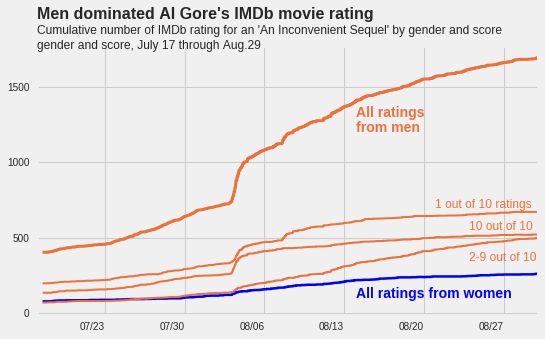

In [36]:
import matplotlib.dates as mdates
from matplotlib.dates import SU
import datetime

plt.style.use('fivethirtyeight')

ax = malesdf_total.plot(color='#EC713B', linewidth=3)
femalesdf_total.plot(color='blue', linewidth=2.5)
malesdf_1_of_10.plot(color='#EC713B', linewidth=2)
malesdf_10_of_10.plot(color='#EC713B', linewidth=2)
malesdf_2_to_9.plot(color='#EC713B', linewidth=2)
ax.set(yticks=range(0,2000,500))

ax.text(x=datetime.date(2017,7,17), y=1950, 
        s="Men dominated Al Gore's IMDb movie rating",
        fontsize=16, fontweight='bold')
ax.text(x=datetime.date(2017,7,17), y=1850, 
        s="Cumulative number of IMDb rating for an 'An Inconvenient Sequel' by gender and score",
        fontsize=12)
ax.text(x=datetime.date(2017, 7, 17), y=1750, 
        s="gender and score, July 17 through Aug.29",
        fontsize=12)

ax.text(x=datetime.date(2017, 8, 14), y=1300, 
        s="All ratings",
        fontsize=14, fontweight='bold', color='#EC713B')
ax.text(x=datetime.date(2017, 8, 14), y=1200, 
        s="from men",
        fontsize=14, fontweight='bold', color='#EC713B')

ax.text(x=datetime.date(2017, 8, 21), y=700, 
        s="1 out of 10 ratings",
        fontsize=12, color='#EC713B')

ax.text(x=datetime.date(2017, 8, 24), y=550, 
        s="10 out of 10",
        fontsize=12, color='#EC713B')

ax.text(x=datetime.date(2017, 8, 24), y=350, 
        s="2-9 out of 10",
        fontsize=12, color='#EC713B')

ax.text(x=datetime.date(2017, 8, 14), y=100, 
        s="All ratings from women",
        fontsize=14, fontweight='bold', color='blue')

# This didnot work to set limit on x axis.
#ax.set_xticklabels(['7/23','7/30','8/6','8/13','8/20','8/27'])
#ax.xaxis.set_data_interval(datetime.date(2017,7,17))
#print("ax.xaxis.get_data_interval",ax.xaxis.get_data_interval())

ax.set_xlim([datetime.date(2017, 7, 17), datetime.date(2017, 8, 30)])
ax.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=SU))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m/%d'))
ax.tick_params(labelrotation=0)
plt.xlabel('');

# This wont work since the axis shall be scaled to match x and y coordinates.
#ax.text(x=0, y=0, s="Men dominated Al Gore's IMDb movie rating")
#ax.text(x=0, y=0, s="Cumulative number of IMDb rating for an 'An Inconvenient Sequel' by")"""